In [39]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt
from prettytable import PrettyTable

# Part 1. One-domentional methods to minimization

In [2]:
def f1(x):
    return x ** 3
def f2(x):
    return abs(x-0.2)
def f3(x):
    return x * math.sin(1/x)

In [3]:
def printTable(heading, data):
    columns = len(heading)  
    table = PrettyTable(heading)  
    tab_data = data[:]
    while tab_data:
        table.add_row(tab_data[:columns])
        tab_data = tab_data[columns:]
    print(table)

In [18]:
def brute_force(function, function_name, a, b, eps):
    n = int((b - a) / eps)
    x = 0
    iteration = 0
    min_value = function(a)
    f_calculations = 1
    for k in range(n):
        x = a + k * (b - a) / n
        if function(x) < min_value:
            min_value = function(x)
        f_calculations += 1
        iteration += 1
    return function_name, min_value, iteration,f_calculations

In [22]:
def add_results(func):
    res=[]
    for i in range(4):
        res.append(func(f1, 'f1', 0, 1, 0.001)[i])
    for i in range(4):
        res.append(func(f2, 'f2', 0, 1, 0.001)[i])
    for i in range(4):
        res.append(func(f3, 'f3', 0.01, 1, 0.001)[i])
    heading = ["Function","Minimum value","Number of iterations","Number of f-calculations"]
    printTable(heading,res)

In [24]:
print('Results of brute force method')
print_results(brute_force)

Results of brute force method
+----------+----------------------+----------------------+--------------------------+
| Function |    Minimum value     | Number of iterations | Number of f-calculations |
+----------+----------------------+----------------------+--------------------------+
|    f1    |          0           |         1000         |           1001           |
|    f2    |         0.0          |         1000         |           1001           |
|    f3    | -0.21722461258083445 |         990          |           991            |
+----------+----------------------+----------------------+--------------------------+


In [25]:
def dichotomy(function,function_name, a, b, eps):
    iteration = 0
    f_calculations = 0
    delta = eps / 2
    while abs(a - b) >= eps:
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        if function(x1) <= function(x2):
            b = x2
        else: 
            a = x1
        iteration += 1
        f_calculations += 2
    min_value = function((a + b ) / 2)
    return function_name, min_value, iteration,f_calculations

In [26]:
print('Results of dichotomy method')
print_results(dichotomy)

Results of dichotomy method
+----------+------------------------+----------------------+--------------------------+
| Function |     Minimum value      | Number of iterations | Number of f-calculations |
+----------+------------------------+----------------------+--------------------------+
|    f1    | 1.2056736854538035e-10 |          11          |            22            |
|    f2    | 0.0001011962890624385  |          11          |            22            |
|    f3    |  -0.21723352556119732  |          11          |            22            |
+----------+------------------------+----------------------+--------------------------+


In [27]:
def golden_section(function, function_name, a, b, eps):
    iteration = 0
    dict_value = {}
    x1 = (3 - 5 ** 0.5) * (b - a) / 2 + a
    x2 = (( 5** 0.5 - 3) * (b - a)) / 2 + b
    f_calculations = 1
    while abs(a - b) >= eps:
        if function(x1) <= function(x2):
            b = x2
            x2 = x1
            x1 = (3 - 5 ** 0.5) * (b - a) / 2 + a
        else: 
            a = x1
            x1 = x2
            x2 = ((5 ** 0.5 - 3) * (b - a)) / 2 + b
        f_calculations +=1
        iteration += 1
    min_value = function((a + b ) / 2)
    return function_name, min_value, iteration,f_calculations

In [28]:
print('Results of golden section method')
print_results(golden_section)

Results of golden section method
+----------+------------------------+----------------------+--------------------------+
| Function |     Minimum value      | Number of iterations | Number of f-calculations |
+----------+------------------------+----------------------+--------------------------+
|    f1    | 4.9256800857728296e-11 |          15          |            16            |
|    f2    | 7.331374358568454e-05  |          15          |            16            |
|    f3    |  -0.21723232817753246  |          15          |            16            |
+----------+------------------------+----------------------+--------------------------+


# Part 2. Multidimensional methods to minimization

In [40]:
#data generation
np.random.seed(seed=60)
alpha, beta = random.randrange(0, 1), random.randrange(0, 1)
xk = [i / 100 for i in range(100)]
yk = [alpha * i + beta + np.random.normal(0, 1) for i in xk]

In [41]:
def linear_approximation(a,b):
    x = []
    y = []
    for k in range(100):
        x.append(k / 100)
        y.append(a * x[k] + b)
    return x, y

def rational_approximation(a,b):
    x = []
    y = []
    for k in range(100):
        x.append(k / 100)
        y.append(a / (1 + b * x[k]))
    return x, y

In [42]:
def lin_apploximant(x,xk,yk):  
    a = x[0]
    b = x[1]
    D_linear = 0
    for k in range(100):
        D_linear += ((a * xk[k] + b) - yk[k]) ** 2
    return D_linear


In [43]:
def rat_apploximant(x,xk,yk):  
    a = x[0]
    b = x[1]
    D_rational = 0
    for k in range(100):
        D_rational += (yk[k] - a / (1 + b * xk[k])) ** 2
    return D_rational

In [87]:
res_lin_brute = opt.brute(lin_apploximant, [[0, 0], [0, 0]], args=(xk,yk))
print("Results of approximation data by linear function using brute force method:", res_lin_brute)

Results of approximation data by linear function using brute force method: [ 0.25071862 -0.02411827]


In [88]:
print("Result of approximation data by linear function using Nelder-Mead method")
print(res_lin_nelder)

Result of approximation data by linear function using Nelder-Mead method
 final_simplex: (array([[ 0.25097343, -0.02426183],
       [ 0.25032449, -0.02399704],
       [ 0.25066616, -0.02432908]]), array([112.81079205, 112.81079345, 112.81079674]))
           fun: 112.81079205005184
       message: 'Optimization terminated successfully.'
          nfev: 87
           nit: 46
        status: 0
       success: True
             x: array([ 0.25097343, -0.02426183])


In [89]:
print("Result approximation data by linear function using  Gauss method")
print(res_lin_gauss)

Result approximation data by linear function using  Gauss method
   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [ 1.00789942e-02, -2.88064752e-04]])
     fun: 112.8149635244767
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 2
  status: 0
 success: True
       x: array([ 0.23171533, -0.01132362])


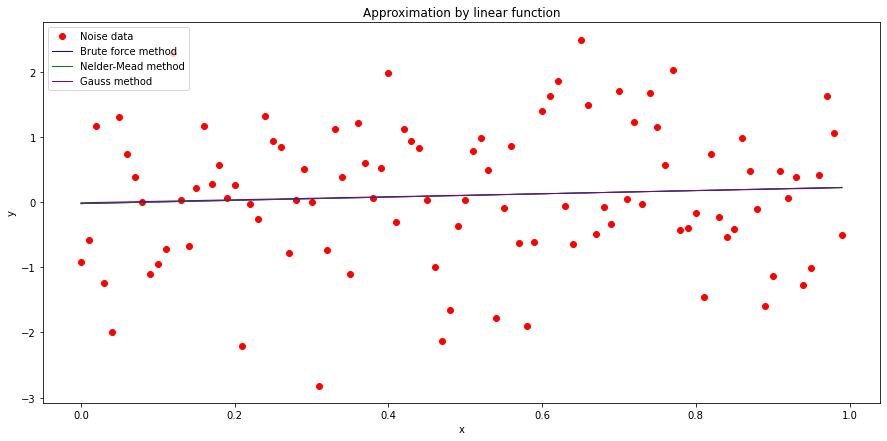

In [80]:
plt.figure(figsize=(15,7)) 
plt.title('Approximation by linear function')   
plt.xlabel('x') 
plt.ylabel('y') 
#plt.legend(['Linear approximation by brute force','Linear approximation bu Nelder-Mead', 
            #'Linear approximation by Gauss', 'Noisy data'])
plt.plot(xk, yk,'o', label = "Noise data", color='red') # noise data 
plt.plot(linear_approximation(res_lin_brute[0], res_lin_brute[1])[0],
         linear_approximation(res_lin_brute[0], res_lin_brute[1])[1],
         linewidth = 1, label = "Brute force method", color='blue') #drew approx function
plt.plot(linear_approximation(*res_lin_nelder.x)[0],
         linear_approximation(*res_lin_nelder.x)[1],
         linewidth = 1, label = "Nelder-Mead method", color='green')
plt.plot(linear_approximation(*res_lin_gauss.x)[0],
         linear_approximation(*res_lin_gauss.x)[1],
         linewidth = 1, label = "Gauss method", color='purple')

plt.legend(loc='upper left') #show legend
plt.show() # show plot

In [90]:
res_rat_brute = opt.brute(rat_apploximant, [[0, 0], [0, 0]], args=(xk,yk))
print("Results of approximation data by rational function using brute force method:", res_rat_brute)

Results of approximation data by rational function using brute force method: [ 0.07316736 -0.54793956]


In [92]:
res_rat_nelder = opt.minimize(rat_apploximant, [0, 0], args = (xk,yk), tol=0.001, method="Nelder-Mead")
print("Results of approximation data by rational function using Nelder-Mead method")
print(res_rat_nelder)

Results of approximation data by rational function using Nelder-Mead method
 final_simplex: (array([[ 0.07313997, -0.54841684],
       [ 0.0732048 , -0.54800388],
       [ 0.07314064, -0.54744849]]), array([113.16044533, 113.16044546, 113.16044618]))
           fun: 113.16044533388556
       message: 'Optimization terminated successfully.'
          nfev: 105
           nit: 55
        status: 0
       success: True
             x: array([ 0.07313997, -0.54841684])


In [93]:
res_rat_gauss = opt.minimize(rat_apploximant, [0, 0], args=(xk,yk), tol=0.001, method='Powell')
print("Results of approximation data by rational function using Gauss method")
print(res_rat_gauss)

Results of approximation data by rational function using Gauss method
   direc: array([[1., 0.],
       [0., 1.]])
     fun: 113.17314882664323
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 2
  status: 0
 success: True
       x: array([ 0.08437935, -0.47181044])


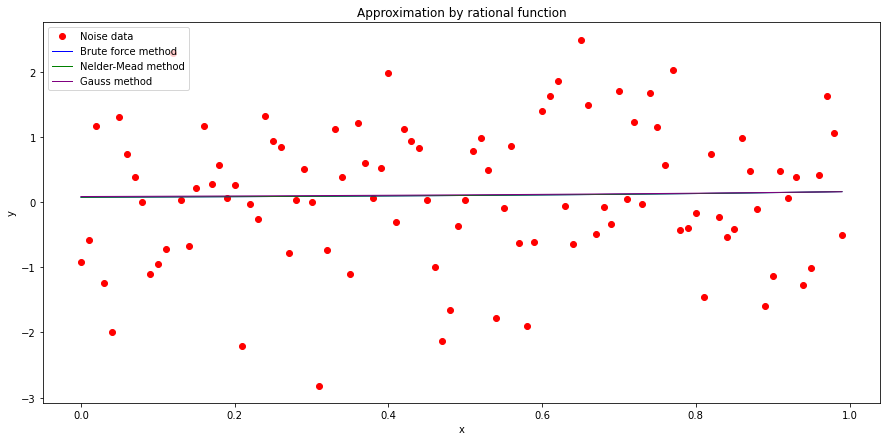

In [86]:
plt.figure(figsize=(15,7)) 
plt.title('Approximation by rational function')   
plt.xlabel('x') 
plt.ylabel('y') 
#plt.legend(['Linear approximation by brute force','Linear approximation bu Nelder-Mead', 
            #'Linear approximation by Gauss', 'Noisy data'])
plt.plot(xk, yk,'o', label = "Noise data", color='red') # noise data 
plt.plot(rational_approximation(res_rat_brute[0], res_rat_brute[1])[0],
         rational_approximation(res_rat_brute[0], res_rat_brute[1])[1],
         linewidth = 1, label = "Brute force method", color='blue') #drew approx function
plt.plot(rational_approximation(*res_rat_nelder.x)[0],
         rational_approximation(*res_rat_nelder.x)[1],
         linewidth = 1, label = "Nelder-Mead method", color='green')
plt.plot(rational_approximation(*res_rat_gauss.x)[0],
         rational_approximation(*res_rat_gauss.x)[1],
         linewidth = 1, label = "Gauss method", color='purple')

plt.legend(loc='upper left') #show legend
plt.show() # show plot